#### Calibration and Exponential Weighting



###### 1) Calibration


Let $E$ be Exxon Mobile stock (ticker XOM), and $I$ be Intel stock (ticker INTC). Their historical values are in the spreadsheets XOM-bloomberg.csv and INTC-bloomberg.csv, respectively, which were downloaded using the Bloomberg Excel API.

Let $\mu(S,t,l)$ and $\sigma (S,t,l)$ be the estimated drift rate (mean) and relative volatility parameters for a GBM process $S$ computed on date $t$ using the last $l$ years worth of observations (i.e. assume $dS$ = $μ$Sdt + $\sigma SdW$ and that $\mu and \sigma$  are constant over that set of observations).

Tabulate and graph $\mu(S,t,l)$ and$\sigma(S,t,l)$ for $S=E$ and $S = I$ for $t$ ranging over the last 20 years, and $l$ being 2, 5, and 10 years, using unweighted fitting. Use adjusted closing prices.

Why are the computed parameters over time comparable even though the value invested varies?

How stable do the results look?




###### 2) Exponential Weighting
Some references say to use exponential weighting with $\lambda$=0.94 or $\lambda$ = 0.97, to calibrate to the last few weeks or about a month of data. These $\lambda$s correspond roughly these periods because the weight becomes 1/2 after approximately 14 days and 22 days, respectively.

To see the impact of exponential weighting with these weights, repeat the previous problem using exponential weighting, with $\lambda$ = 0.94 and $\lambda$ = 0.97.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn;seaborn.set() 
from scipy.stats import norm 
from math import log

##### Import the two stock prices data: XOM and INTC

In [3]:
XOM = pd.read_csv("~/Desktop/XOM-bloomberg.csv", usecols = ['Dates','PX_LAST'])
XOM['Dates'] = pd.to_datetime(XOM.Dates).dt.date
XOM = XOM.set_index('Dates')
INTC = pd.read_csv("~/Desktop/INTC-bloomberg.csv", usecols = ['Dates','PX_LAST'])
INTC['Dates'] = pd.to_datetime(INTC.Dates).dt.date
INTC = INTC.set_index('Dates')

##### Using moving average to different windows (2year, 5year and 10year)

In [25]:
### windowed
def window(price, time, size):
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.rolling(window=size).std()/np.sqrt(time)
    mu = logreturn.rolling(window=size).mean()/time + (vol**2)/2
    para = pd.concat([price, mu, vol], axis=1)
    para.columns = ['price', 'mu', 'vol']
    para = para[len(para)-252*25:]
    return para
mu2year = window(XOM,1/252,2*252)
mu5year = window(XOM,1/252,5*252)
mu10year = window(XOM,1/252,10*252)

mu2year1 = window(INTC,1/252,2*252)
mu5year1 = window(INTC,1/252,5*252)
mu10year1 = window(INTC,1/252,10*252)

##### I plot the drift and the volatility of the stock XOM. and INTC

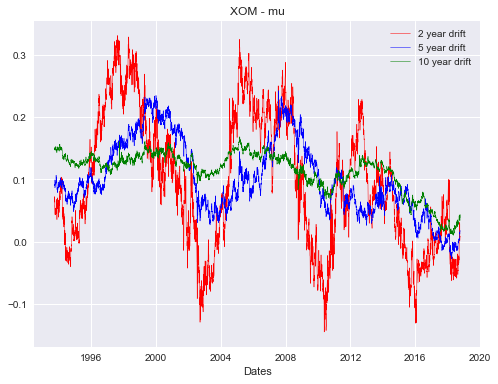

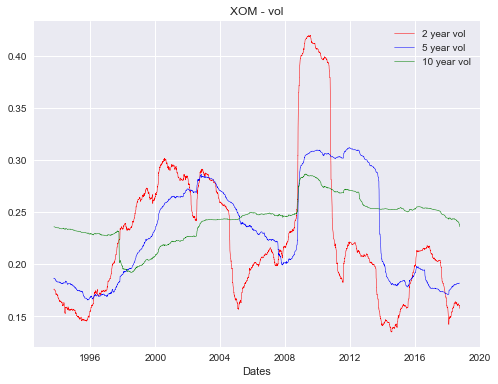

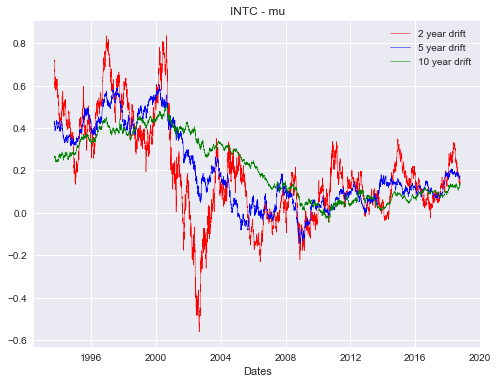

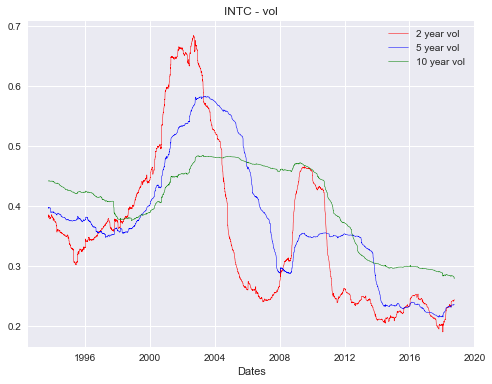

In [26]:
fig,ax=plt.subplots(figsize=(8,6))
mu2year.iloc[:,1].plot(color='red',linewidth=0.5,label='2 year drift')
mu5year.iloc[:,1].plot(color='blue',linewidth=0.5,label='5 year drift')
mu10year.iloc[:,1].plot(color='green',linewidth=0.5,label='10 year drift')
plt.legend(loc='upper right')
plt.title('XOM - mu')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
mu2year.iloc[:,2].plot(color='red',linewidth=0.5,label='2 year vol')
mu5year.iloc[:,2].plot(color='blue',linewidth=0.5,label='5 year vol')
mu10year.iloc[:,2].plot(color='green',linewidth=0.5,label='10 year vol')
plt.legend(loc='upper right')
plt.title('XOM - vol')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
mu2year1.iloc[:,1].plot(color='red',linewidth=0.5,label='2 year drift')
mu5year1.iloc[:,1].plot(color='blue',linewidth=0.5,label='5 year drift')
mu10year1.iloc[:,1].plot(color='green',linewidth=0.5,label='10 year drift')
plt.legend(loc='upper right')
plt.title('INTC - mu')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
mu2year1.iloc[:,2].plot(color='red',linewidth=0.5,label='2 year vol')
mu5year1.iloc[:,2].plot(color='blue',linewidth=0.5,label='5 year vol')
mu10year1.iloc[:,2].plot(color='green',linewidth=0.5,label='10 year vol')
plt.legend(loc='upper right')
plt.title('INTC - vol')
plt.show()

Computed parameters are comparable over time because they are all for the GBM.functional form. In GBM, the drift and variance are relative to the stock price and annualized (i.e. expressed as a percentage of the stock price). Hence, if the parameters are stable, then they are independent of the level of the stock and hence are comparable over time.

Observations:

 $\bullet$ The 2 year results are very jumpy.
 
 $\bullet$ The 10 year results look too smooth – they adapt very slowly to changing environments.
 
 $\bullet$ The 5 year results look usable.
 
 $\bullet$ The drift estimates are much more noisy than the volatility estimates with the same size window.
 
 $\bullet$ The drift estimates have a much greater variance than the volatility estimates.
 
 $\bullet$ Different choices of window size yield substantially di↵erent estimates for the drift and volatility.
 
The noise exhibited in the drift estimates indicates why drifts are often assumed to be zero in risk calculations.

###### Using exponential moving average to different windows (2year, 5year and 10year)

In [23]:
### exponential
def expo(price, time, weight):
    logreturn = np.log(price/price.shift(1))
    vol = logreturn.ewm(alpha = 1 - weight).std()/np.sqrt(time)
    mu = logreturn.ewm(alpha = 1 - weight).mean()/time + (vol**2)/2 
    para = pd.concat([price, mu, vol], axis=1)
    para.columns = ['price', 'mu', 'vol']
    para = para[len(para)-252*25:]
    return para

lambda1=0.97
lambda2=0.94

expo1=expo(XOM,1/252,lambda1)
expo2=expo(XOM,1/252,lambda2)
expo3=expo(INTC,1/252,lambda1)
expo4=expo(INTC,1/252,lambda2)

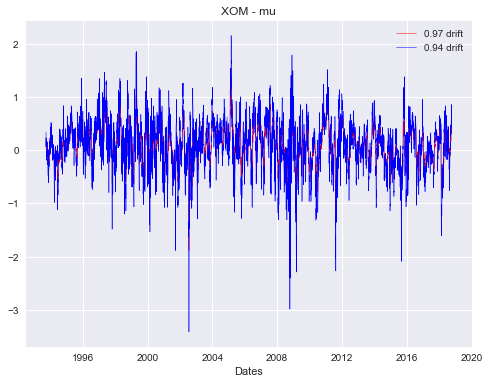

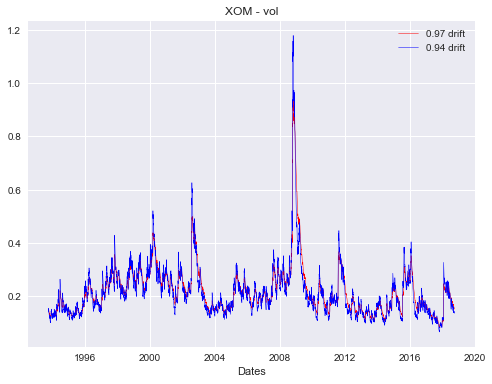

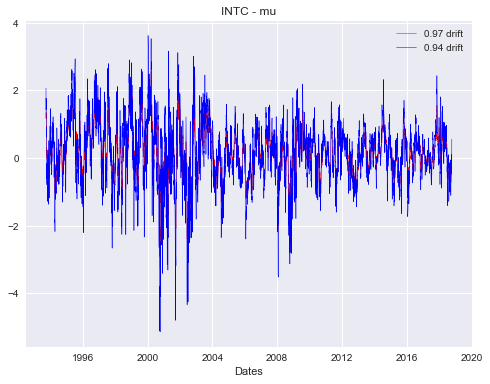

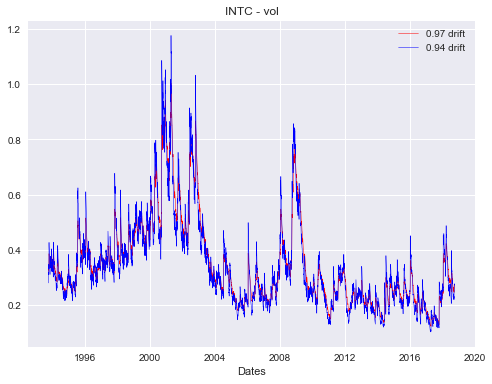

In [24]:
fig,ax=plt.subplots(figsize=(8,6))
expo1.iloc[:,1].plot(color='red',linewidth=0.5,label='0.97 drift')
expo2.iloc[:,1].plot(color='blue',linewidth=0.5,label='0.94 drift')
plt.legend(loc='upper right')
plt.title('XOM - mu')
plt.show()

fig,ax=plt.subplots(figsize=(8,6))
expo1.iloc[:,2].plot(color='red',linewidth=0.5,label='0.97 drift')
expo2.iloc[:,2].plot(color='blue',linewidth=0.5,label='0.94 drift')
plt.legend(loc='upper right')
plt.title('XOM - vol')
plt.show()


fig,ax=plt.subplots(figsize=(8,6))
expo3.iloc[:,1].plot(color='red',linewidth=0.5,label='0.97 drift')
expo4.iloc[:,1].plot(color='blue',linewidth=0.5,label='0.94 drift')
plt.legend(loc='upper right')
plt.title('INTC - mu')
plt.show()


fig,ax=plt.subplots(figsize=(8,6))
expo3.iloc[:,2].plot(color='red',linewidth=0.5,label='0.97 drift')
expo4.iloc[:,2].plot(color='blue',linewidth=0.5,label='0.94 drift')
plt.legend(loc='upper right')
plt.title('INTC - vol')
plt.show()

It seems that the parameters $\mu$ and $\sigma$ are much more noisy when using $\lambda =0.94$ as the weight. The $\lambda =0.97$ is less noisy. Totally, the trends of them are very similar. 